# LINEAR REGRESSION EXERCICE

I will try to decribe in this exercice three different appoaches to calculate a linear regression model for a random set of data

In linear regression, our hypothesis function $h_\theta$ is:

$$h_\theta(x) = \theta_0 + \theta_1x$$

And the cost function is: 

$$J(\theta_0,\theta_1) = \frac{1}{m}\sum_{i=1}^m(\hat{y}_i-y_i)^2 = \frac{1}{m}\sum_{i=1}^m(h_\theta(x_i)-y_i)^2 $$

In order to calculate the parameters $\theta_0$ and $\theta_1$ that defines the model, three approaches have been considered:

 * Mathematical approach
 * Gradient descent by analitical approach 
 * Gradient descent by numerical approach 


### Generate dummy data

First of all, the random data set is created.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

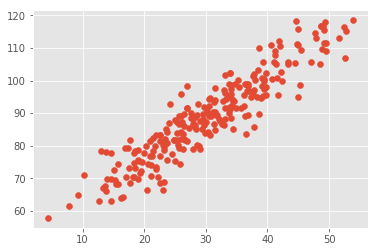

In [2]:
theta_real_0 = 50
theta_real_1 = 1.3

np.random.seed(0)
xs = np.random.normal(30.0, 10.0,250)
ys = theta_real_0 + theta_real_1 * xs + np.random.normal(0, 5.0,250)

plt.scatter(xs,ys)

### COST FUNCTION

In this section, cost function is defined and calculated with random $\theta_0$ and $\theta_1$, just as an example.

In [3]:
def cost_function(x,y,theta_0,theta_1):
    m = len(xs)
    cost_function = (1/m) * (((theta_1 * xs + theta_0) - ys)**2).sum()
    return cost_function

In [4]:
theta_0 = theta_real_0
theta_1 = theta_real_1
cost_function(xs,ys,theta_0,theta_1)

25.01733333517974

### MATHEMATICAL APPROACH

The $\theta_0$ and $\theta_1$ formulae that minimizes the cost function are the followings:


$$\theta_1 = \frac{\sum_{i=1}^m({x}_i-\bar{x}).({y}_i-\bar{y})}{\sum_{i=1}^m({x}_i-\bar{x})^2} $$


$$\theta_0 = \bar{y} - \theta_1.\bar{x} $$


Where $\bar{x}$ and $\bar{y}$ are the average of x and y data sets, respectively.

In [5]:
xs_mean = xs.mean()
ys_mean = ys.mean()
theta_1_function = ((xs-xs_mean)*(ys-ys_mean)).sum() / ((xs-xs_mean)**2).sum()
theta_0_function = ys_mean - theta_1_function * xs_mean
cost_function_min = cost_function(xs,ys,theta_0_function,theta_1_function)

print('Average of xs = %.3f' %(xs_mean))
print('Average of ys = %.3f' %(ys_mean))
print('Theta_0 = %.5f' %(theta_0_function))
print('Theta_1 = %.5f' %(theta_1_function))
print('Minimum Cost Function value = %.5f' %(cost_function_min))

Average of xs = 30.318
Average of ys = 89.001
Theta_0 = 51.54266
Theta_1 = 1.23551
Minimum Cost Function value = 24.43460


## GRADIENT DESCENT BY ANALITICAL APPROACH

In order to find $\theta_0$ and $\theta_1$ by gradient descent, partial differentials of the cost function must be calculated:

$$\frac{\partial}{\partial\theta_0} = \frac{1}{m}\sum_{i=1}^m(h_\theta(x_i)-y_i)$$



$$\frac{\partial}{\partial\theta_1} = \frac{1}{m}\sum_{i=1}^m(h_\theta(x_i)-y_i) \cdot x_i$$


The way to minimize the cost funcion is varying $\theta_0$ and $\theta_1$ following the steepest gradient. This can be done by multipling the partial differentials by a negative small factor (learning rate or alpha) in an iterative loop.

In [99]:
def partial_0(x,y,theta_0,theta_1):
    m = len(xs)
    G_theta_0 = (1/m) * ((theta_1 * xs + theta_0) - ys).sum()
    return G_theta_0

In [100]:
def partial_1(x,y,theta_0,theta_1):
    m = len(xs)
    G_theta_1 = (1/m) * (((theta_1 * xs + theta_0) - ys)*xs).sum()
    return G_theta_1

In [123]:
def linear_regression_1(x,y,i_limit=100000,diff_limit=0.00000001,alpha=0.0009):
    i = 0                           #Iterations
    theta_0 = 0                     #Initialization of variables theta_0 with a random value
    theta_1 = 0                     #Initialization of variables theta_1 with a random value
    diff = 1                        #Cost function difference between consecutive iterations
 
    cost_function_1 = cost_function(xs, ys, theta_0, theta_1)   #First Cost function
    G_theta_0 = partial_0(xs, ys, theta_0, theta_1)              #First partial difference for theta_0
    G_theta_1 = partial_1(xs, ys, theta_0, theta_1)      #First partial difference for theta_1

    while diff > diff_limit and i < i_limit:
    
        theta_0 -= alpha * G_theta_0    #Gradient descent for theta_0
        theta_1 -= alpha * G_theta_1    #Gradient descent for theta_1
    
        cost_function_2 = cost_function(xs, ys, theta_0, theta_1)
        diff = abs(cost_function_1 - cost_function_2)
    
        G_theta_0 = partial_0(xs, ys, theta_0, theta_1)
        G_theta_1 = partial_1(xs, ys, theta_0, theta_1)
        cost_function_1 = cost_function_2
        i += 1

    print('Theta_0 = %.5f' %(theta_0))
    print('Theta_1 = %.5f' %(theta_1))
    print('Final cost_function value = %.5f' %(cost_function_2))
    print('Number of iterations = ', i)
    print('Final Cost function difference = %.6f' %(diff))
    
    return theta_0, theta_1, cost_function_2

Theta_0 = 51.51970
Theta_1 = 1.23620
Final cost_function value = 24.43465
Number of iterations =  79251
Final Cost function difference = 0.000000


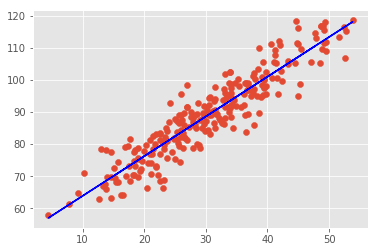

In [124]:
theta_0, theta_1, cost_function_2 = linear_regression_1(xs,ys,alpha=.001)
    
ys_pred = theta_0 + theta_1 * xs
plt.scatter(xs,ys)
plt.plot(xs,ys_pred,color='b')

In order to check that this approac is OK, the difference between this result and the Mathematical approach is calculated

In [103]:
def errors():
    theta_0_error = abs(theta_0 - theta_0_function) / theta_0_function * 100
    theta_1_error = abs(theta_1 - theta_1_function) / theta_1_function * 100
    cost_function_error = abs(cost_function_2 - cost_function_min) / cost_function_min * 100
    print('Theta_0 error: {:.3f}%'.format(theta_0_error))
    print('Theta_1 error: {:.3f}%'.format(theta_1_error))
    print('Cost function: {:.3f}%'.format(cost_function_error))
    return

In [104]:
errors()

Theta_0 error: 0.047%
Theta_1 error: 0.058%
Cost function: 0.000%


NOTE: Possibly I am wrong, but I think there is a '2' missing in the partial differences formulae. In my opinion the correct ones are:

$$\frac{\partial}{\partial\theta_0} = \frac{2}{m}\sum_{i=1}^m(h_\theta(x_i)-y_i)$$


$$\frac{\partial}{\partial\theta_1} = \frac{2}{m}\sum_{i=1}^m(h_\theta(x_i)-y_i) \cdot x_i$$


So, in order to check that this difference do not affect sificantly the results, the same calculations are done considering the above formulae.

In [105]:
def partial_0_1(x,y,theta_0,theta_1):
    m = len(xs)
    G_theta_0 = (2/m) * ((theta_1 * xs + theta_0) - ys).sum()
    return G_theta_0

In [106]:
def partial_1_1(x,y,theta_0,theta_1):
    m = len(xs)
    G_theta_1 = (2/m) * (((theta_1 * xs + theta_0) - ys)*xs).sum()
    return G_theta_1

In [131]:
def linear_regression_2(x,y,i_limit=100000,diff_limit=0.00000001,alpha=0.0009):
    i = 0                           #Iterations
    theta_0 = 0                     #Initialization of variables theta_0 with a random value
    theta_1 = 0                     #Initialization of variables theta_1 with a random value
    diff = 1                        #Cost function difference between consecutive iterations
 
    cost_function_1 = cost_function(xs, ys, theta_0, theta_1)   #First Cost function
    G_theta_0 = partial_0_1(xs, ys, theta_0, theta_1)              #First partial difference for theta_0
    G_theta_1 = partial_1_1(xs, ys, theta_0, theta_1)      #First partial difference for theta_1

    while diff > diff_limit and i < i_limit:
    
        theta_0 -= alpha * G_theta_0    #Gradient descent for theta_0
        theta_1 -= alpha * G_theta_1    #Gradient descent for theta_1
    
        cost_function_2 = cost_function(xs, ys, theta_0, theta_1)
        diff = abs(cost_function_1 - cost_function_2)
    
        G_theta_0 = partial_0_1(xs, ys, theta_0, theta_1)
        G_theta_1 = partial_1_1(xs, ys, theta_0, theta_1)
        cost_function_1 = cost_function_2
        i += 1

    print('Theta_0 = %.5f' %(theta_0))
    print('Theta_1 = %.5f' %(theta_1))
    print('Final cost_function value = %.5f' %(cost_function_2))
    print('Number of iterations = ', i)
    print('Final Cost function difference = %.6f' %(diff))
    
    return theta_0, theta_1, cost_function_2

Theta_0 = 51.52555
Theta_1 = 1.23602
Final cost_function value = 24.43463
Number of iterations =  45704
Final Cost function difference = 0.000000


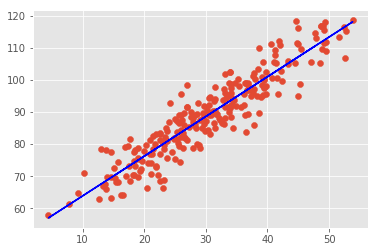

In [133]:
theta_0, theta_1, cost_function_2 = linear_regression_2(xs,ys)
    
ys_pred = theta_0 + theta_1 * xs
plt.scatter(xs,ys)
plt.plot(xs,ys_pred,color='b')

In [129]:
errors()

Theta_0 error: 0.033%
Theta_1 error: 0.041%
Cost function: 0.000%


It can be concluded that, despite the fact both results are similar, the last one reaches the solution after "only" 48828 iterations, and the first one (considering the former formulea without '2') after 94398. So, it seems that the '2' version is better.

## CALCULATION BY NUMERICAL APPROACH

The last approach I am going to try is the numerical one. The methodology it is completely simiar to the analitical approach, but instead of considering the analitical formulae for partial differences, an incremental approximation is used. The advantage of this approach is that it can be used with regressions not as easy to derivate analitically as linear regression is, (or when you do not know how to obtain the gradient's formulae).

In this case, the formulae are the followings:

$$\frac{\partial J(\theta_0,\theta_1)}{\partial\theta_0} \simeq \frac{\Delta J(\theta_0,\theta_1)}{\Delta\theta_0} = \frac{J(\theta_0+\Delta \theta_0,\theta_1)-J(\theta_0,\theta_1)}{\Delta \theta_0}$$


$$\frac{\partial J(\theta_0,\theta_1)}{\partial\theta_1} \simeq \frac{\Delta J(\theta_0,\theta_1)}{\Delta\theta_1} = \frac{J(\theta_0,\theta_1+\Delta \theta_1)-J(\theta_0,\theta_1)}{\Delta \theta_1}$$



In [110]:
def linear_regression_num(x,y,i_limit=100000,diff_limit=0.00000001,alpha=0.0009,beta = 1.001):
    i = 0                       #Iterations
    theta_0 = 1                 #Initialization of variables theta_0 with a random value.Warning: it cannot be 0
    theta_1 = 1                 #Initialization of variables theta_1 with a random value
    diff = 1                    #Cost function difference between consecutive iterations

    m = len(xs)
    cost_function_1 = cost_function(xs, ys, theta_0, theta_1)
    cost_function_1_GN_0 = (1/m) * ((((theta_1 * xs) + (beta * theta_0)) - ys)**2).sum()
    cost_function_1_GN_1 = (1/m) * ((((beta * theta_1) * xs + theta_0) - ys)**2).sum()

    GN_theta_0 = (cost_function_1_GN_0 - cost_function_1) / (theta_0 * (beta - 1))
    GN_theta_1 = (cost_function_1_GN_1 - cost_function_1) / (theta_1 * (beta - 1))

    while diff > diff_limit and i < i_limit:
    
        theta_0 = theta_0 - alpha * GN_theta_0
        theta_1 = theta_1 - alpha * GN_theta_1
        cost_function_2 = cost_function(xs, ys, theta_0, theta_1)
    
        diff = abs(cost_function_1 - cost_function_2)

        cost_function_1_GN_0 = (1/m) * ((((theta_1 * xs) + (beta * theta_0)) - ys)**2).sum()
        cost_function_1_GN_1 = (1/m) * ((((beta * theta_1) * xs + theta_0) - ys)**2).sum()
        GN_theta_0 = (cost_function_1_GN_0 - cost_function_2) / (theta_0 * (beta - 1))
        GN_theta_1 = (cost_function_1_GN_1 - cost_function_2) / (theta_1 * (beta - 1))

        cost_function_1 = cost_function_2
        i += 1

    print('Theta_0 = %.5f' %(theta_0))
    print('Theta_1 = %.5f' %(theta_1))
    print('Final cost_function value = %.5f' %(cost_function_2))
    print('Number of iterations = ', i)
    print('Final Cost function difference = %.6f' %(diff))
    
    return theta_0, theta_1, cost_function_2
    


Theta_0 = 51.46714
Theta_1 = 1.23714
Final cost_function value = 24.43555
Number of iterations =  53597
Final Cost function difference = 0.000000


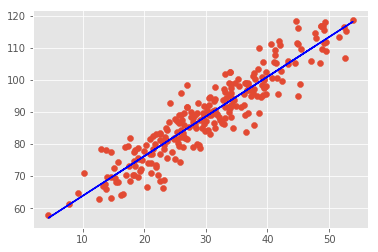

In [111]:
theta_0, theta_1, cost_function_2 = linear_regression_num(xs,ys)
    
ys_pred = theta_0 + theta_1 * xs
plt.scatter(xs,ys)
plt.plot(xs,ys_pred,color='b')

The differences with the mathematical calculation are similar than the analitical approach:

In [112]:
errors()

Theta_0 error: 0.147%
Theta_1 error: 0.132%
Cost function: 0.004%


## GRADIENT DESCENT BY ANALITICAL APPROACH - ONE BY ONE VARIABLE

This is a test to check that it is important to performe the gradient descent with both variables at the same time, no one varible first, and then, the other.

In [113]:
def linear_regression_2_ONE(x,y,i_limit=100000,diff_limit=0.00000001,alpha=0.0009):
    i = 0                           #Iterations
    theta_0 = 1                     #Initialization of variables theta_0 with a random value
    theta_1 = 1                     #Initialization of variables theta_1 with a random value
    diff = 1                        #Cost function difference between consecutive iterations
 
    cost_function_1 = cost_function(xs, ys, theta_0, theta_1)   #First Cost function
    G_theta_1 = partial_1_1(xs, ys, theta_0, theta_1)      #First partial difference for theta_1

    while diff > diff_limit and i < i_limit:
    

        theta_1 -= alpha * G_theta_1    #Gradient descent for theta_1
    
        cost_function_2 = cost_function(xs, ys, theta_0, theta_1)
        diff = abs(cost_function_1 - cost_function_2)
        G_theta_1 = partial_1_1(xs, ys, theta_0, theta_1)
        cost_function_1 = cost_function_2
        i += 1
        
    j = 0
    diff_2 = 1    
    
    G_theta_0 = partial_0_1(xs, ys, theta_0, theta_1)              #First partial difference for theta_0
    
    while diff_2 > diff_limit and j < i_limit:
        theta_0 -= alpha * G_theta_0    #Gradient descent for theta_0    
        cost_function_2 = cost_function(xs, ys, theta_0, theta_1)
        diff = abs(cost_function_1 - cost_function_2)    
        G_theta_0 = partial_0_1(xs, ys, theta_0, theta_1)
        cost_function_1 = cost_function_2
        j += 1
        
    j += i
    
    print('Theta_0 = %.5f' %(theta_0))
    print('Theta_1 = %.5f' %(theta_1))
    print('Final cost_function value = %.5f' %(cost_function_2))
    print('Number of iterations = ', i)
    print('Number of iterations = ', j)
    print('Final Cost function difference = %.6f' %(diff_2))
    
    return theta_0, theta_1, cost_function_2

Theta_0 = 5.92424
Theta_1 = 2.74019
Final cost_function value = 249.07674
Number of iterations =  71
Number of iterations =  100071
Final Cost function difference = 1.000000


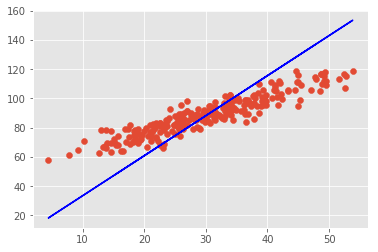

In [143]:
theta_0, theta_1, cost_function_2 = linear_regression_2_ONE(xs,ys,alpha=0.0009)
    
ys_pred = theta_0 + theta_1 * xs
plt.scatter(xs,ys)
plt.plot(xs,ys_pred,color='b')

## OTHER POSSIBLE IDEAS TO SOLVE THE OVERLOADING PROBLEM: 

1. Gradient descent considering two different learning rates
2. Try to solve overloading when learning rate is low